# **1. Import libraries**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")

# **2. Load dataset**

In [23]:
zomato_df = pd.read_csv("./datasets/zomato.csv")

# **3. Basic exploration**

In [29]:
print("Shape of the dataset:")
print(zomato_df.shape)

Shape of the dataset:
(51717, 17)


In [30]:
print(f"Information of the dataset:\n")
print(zomato_df.info())

Information of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  re

In [31]:
print(f"Summary of the dataset:")
zomato_df.describe().style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

Summary of the dataset:


,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [32]:
zomato_df.describe(include=object).T.style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

,count,unique,top,freq
url,51717,51717,https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19,1
address,51717,11495,Delivery Only,128
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
rate,43942,64,NEW,2208
phone,50509,14926,080 43334321,216
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182


In [33]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
#dropping unnecessary columns
zomato_df.drop(["url", "phone", "dish_liked"], axis=1, inplace=True)

In [ ]:
#checking duplicated values
zomato_df.duplicated().sum()

43

In [37]:
#dropping the duplicated values from the dataset
zomato_df.drop_duplicates(inplace=True)

In [38]:
#missing values
zomato_df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

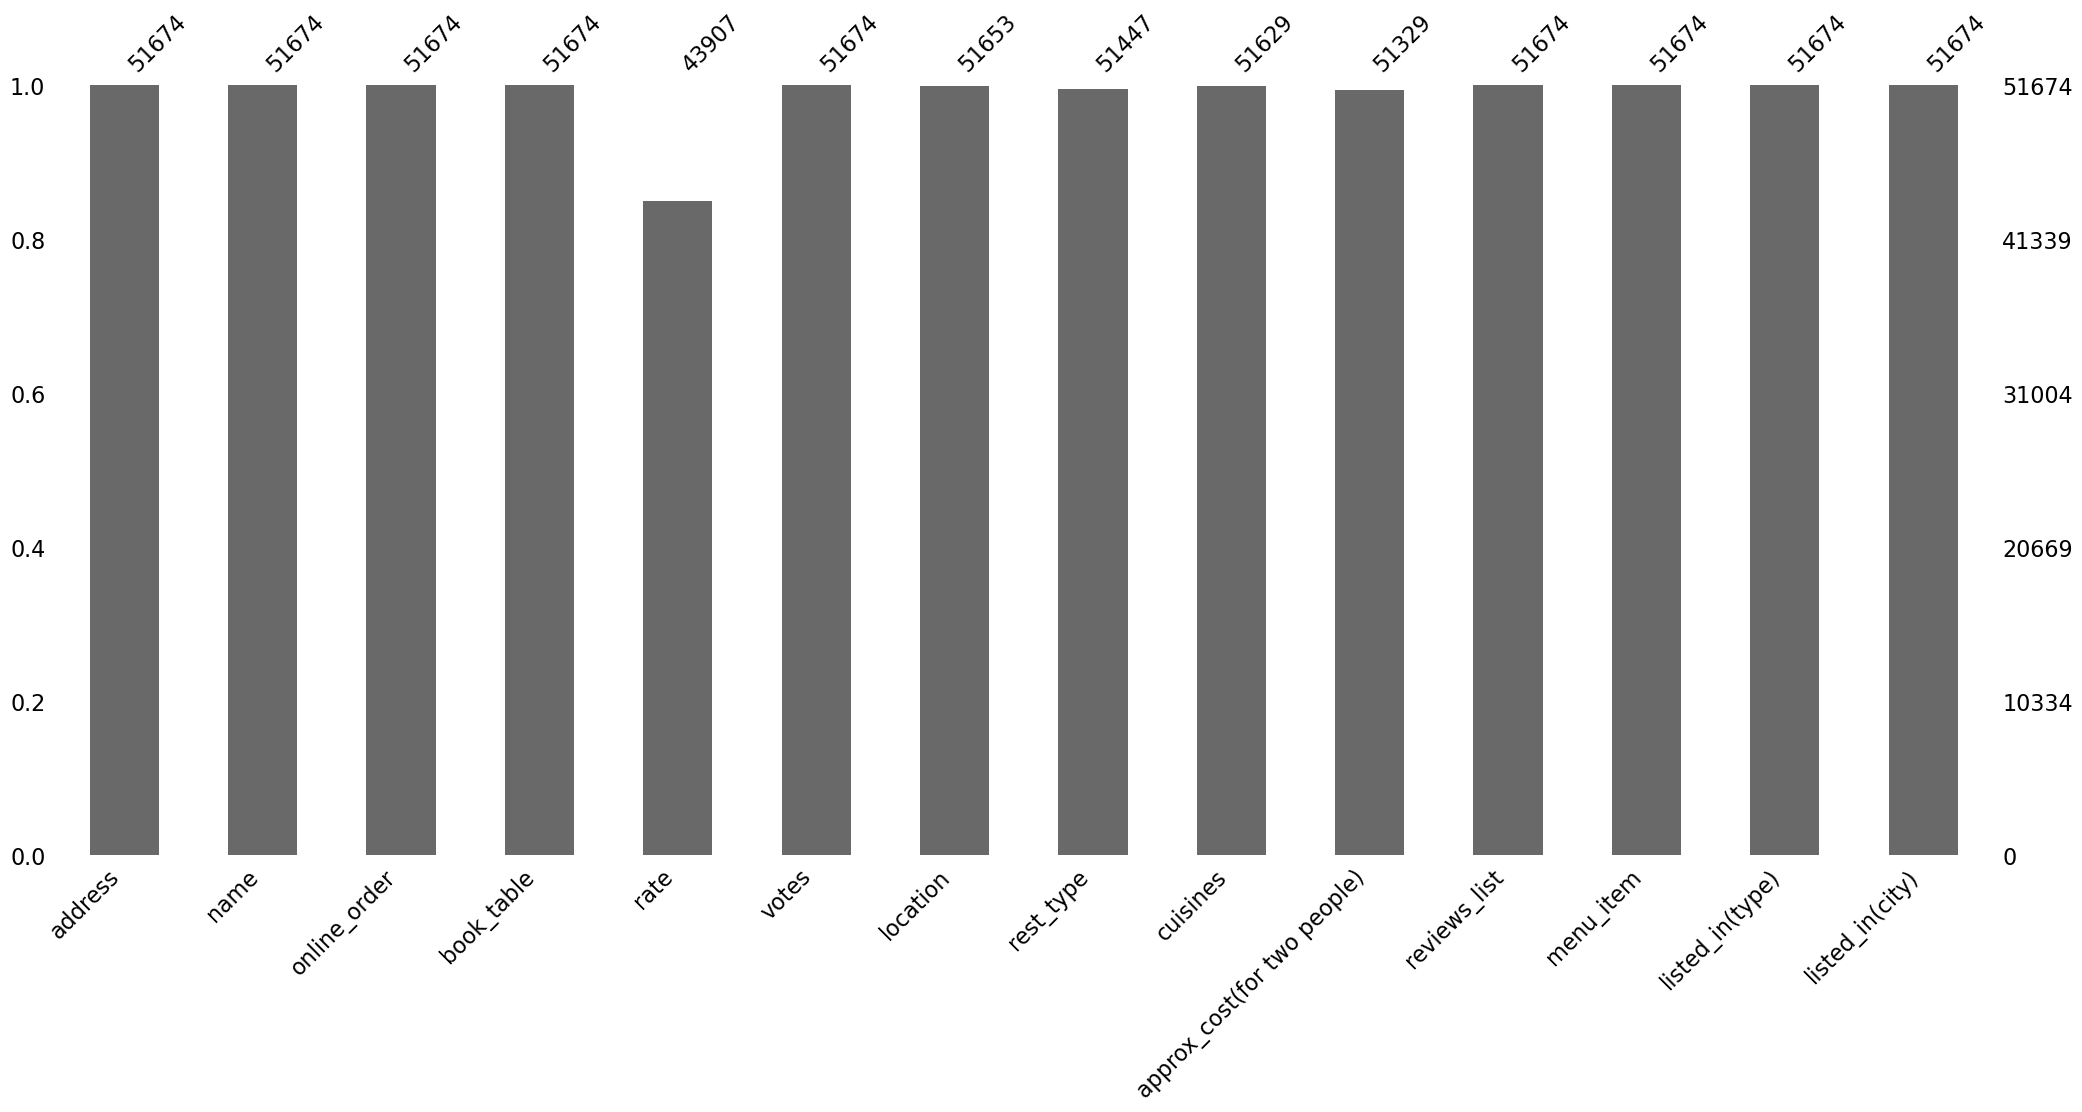

In [40]:
import missingno as msno
msno.bar(zomato_df)
plt.show()

In [41]:
#dropping the null value from the dataset
zomato_df.dropna(how="any", inplace=True)

In [ ]:
#renaming columns
zomato_df = zomato_df.rename(columns={"approx_cost(for two people)": "cost", "listed_in(type)": "type", "listed_in(city)": "city"})

In [43]:
zomato_df.dtypes

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [ ]:
zomato_df["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [45]:
#transformations
zomato_df["cost"] = zomato_df["cost"].astype(str)
zomato_df["cost"] = zomato_df["cost"].apply(lambda x: x.replace(',', '.')) #using lambda function to replace ',' from cost
zomato_df["cost"] = zomato_df["cost"].astype(float)

In [46]:
zomato_df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#removing "/5" from rates
zomato_df = zomato_df.loc[zomato_df.rate != "NEW"]
zomato_df = zomato_df.loc[zomato_df.rate != "-"].reset_index(drop=True)
remove_slash = lambda x: x.replace("/5", "") if isinstance(x, str) else x
zomato_df["rate"] = zomato_df["rate"].apply(remove_slash).str.strip().astype("float")
zomato_df["rate"].head() #looking at the dataset after transformations

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
#adjust the column names
zomato_df["name"] = zomato_df["name"].apply(lambda x: x.title())
zomato_df["online_order"].replace(("Yes", "No"), (True, False), inplace=True)
zomato_df["book_table"].replace(("Yes", "No"), (True, False), inplace=True)
zomato_df.head() #looking at the dataset after transformations

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [51]:
#encode the input variables
def Encode(zomato_df):
    for column in zomato_df.columns[~zomato_df.columns.isin(["rate", "cost", "votes"])]:
        zomato_df[column] = zomato_df[column].factorize()[0]
    return zomato_df

zomato_en = Encode(zomato_df.copy())
zomato_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

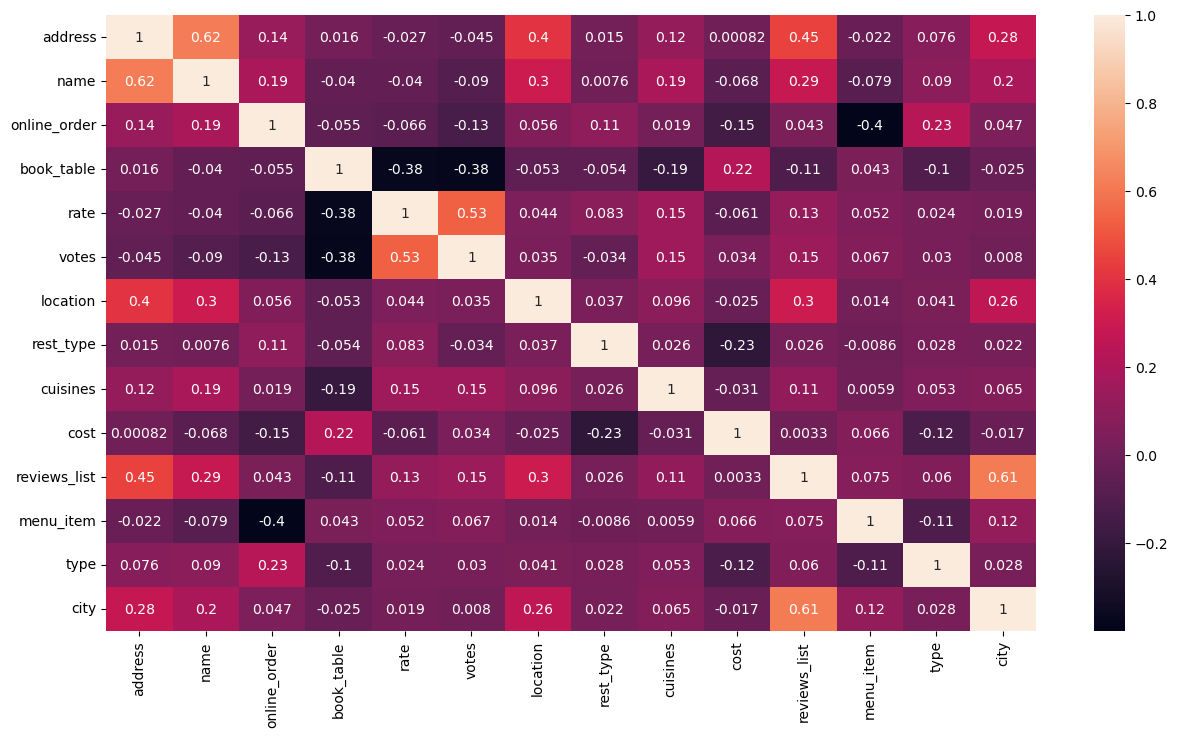

In [52]:
#get correlation between different variables
corr = zomato_en.corr(method="kendall")
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)
zomato_en.columns